In [51]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [3]:
#load in training dataset
train_df = pd.read_csv('train.csv')

In [4]:
#look at sample
train_df.head(20)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [5]:
#total count of records
train_df.count()

id           750000
age          750000
job          750000
marital      750000
education    750000
default      750000
balance      750000
housing      750000
loan         750000
contact      750000
day          750000
month        750000
duration     750000
campaign     750000
pdays        750000
previous     750000
poutcome     750000
y            750000
dtype: int64

In [6]:
#check datatypes of columns
train_df.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [7]:
#check balane of target variables
train_df['y'].value_counts()
#imbalance

y
0    659512
1     90488
Name: count, dtype: int64

In [8]:
# Count null values in each column of train_df
null_counts_train = train_df.isnull().sum()
print("\nNull counts in train_df:")
print(null_counts_train)


Null counts in train_df:
id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
#separate out numerical columns and categorical columns for exploratory data analysis
numerical_columns = train_df.select_dtypes('int64').columns
categorical_columns = train_df.select_dtypes('object').columns

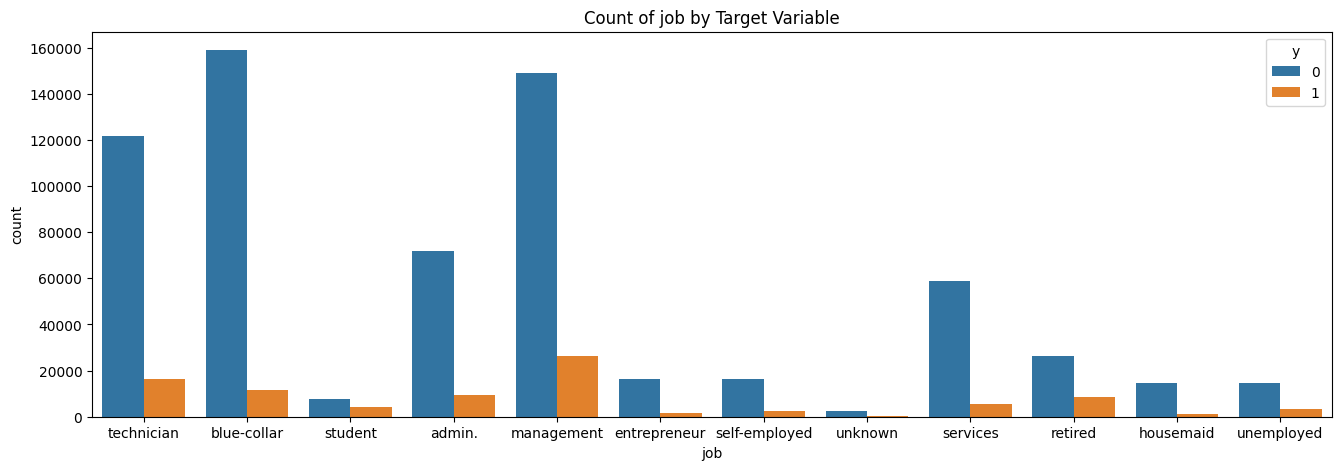

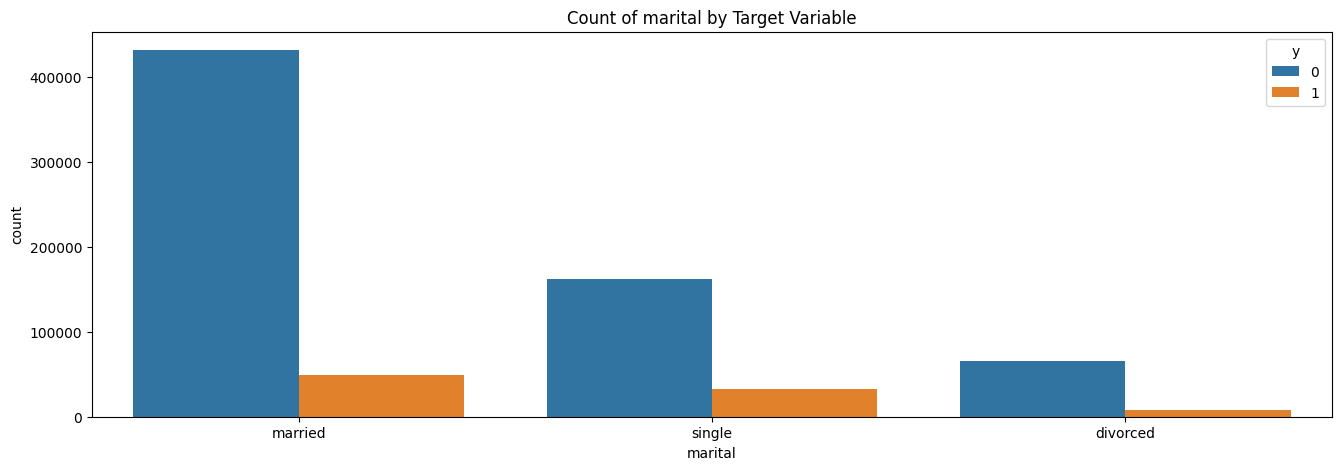

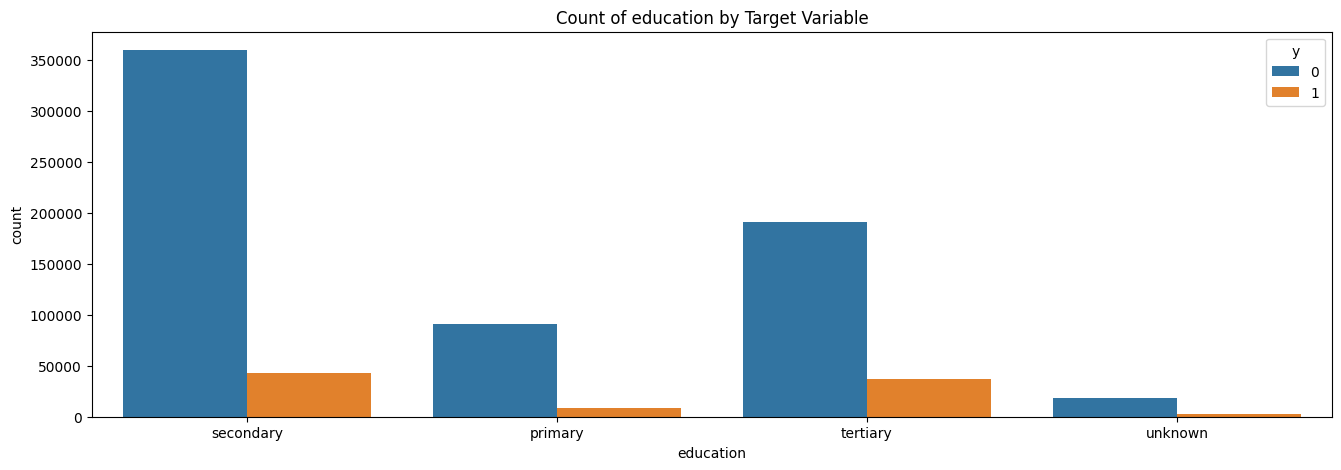

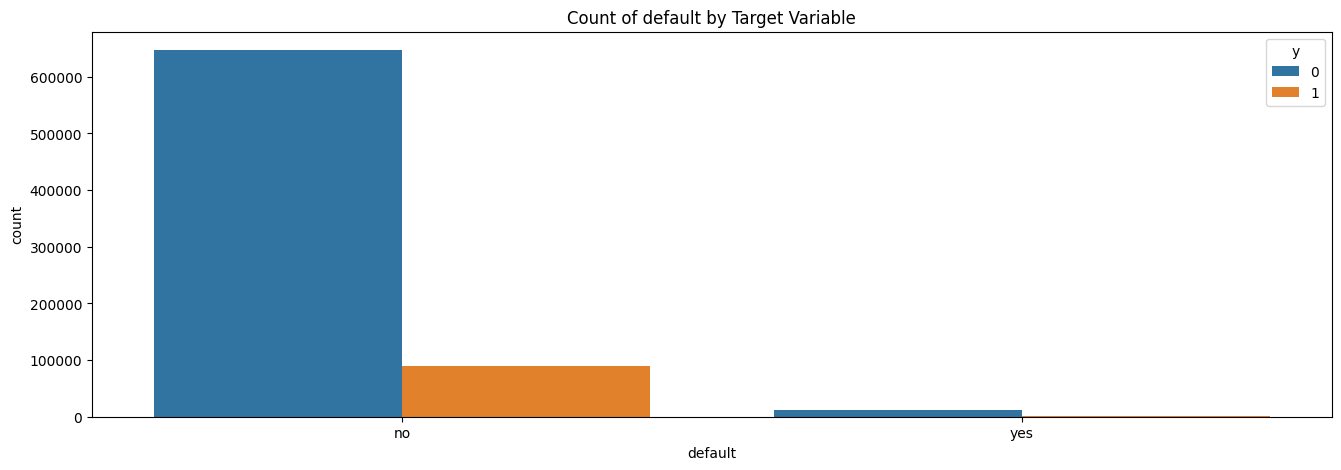

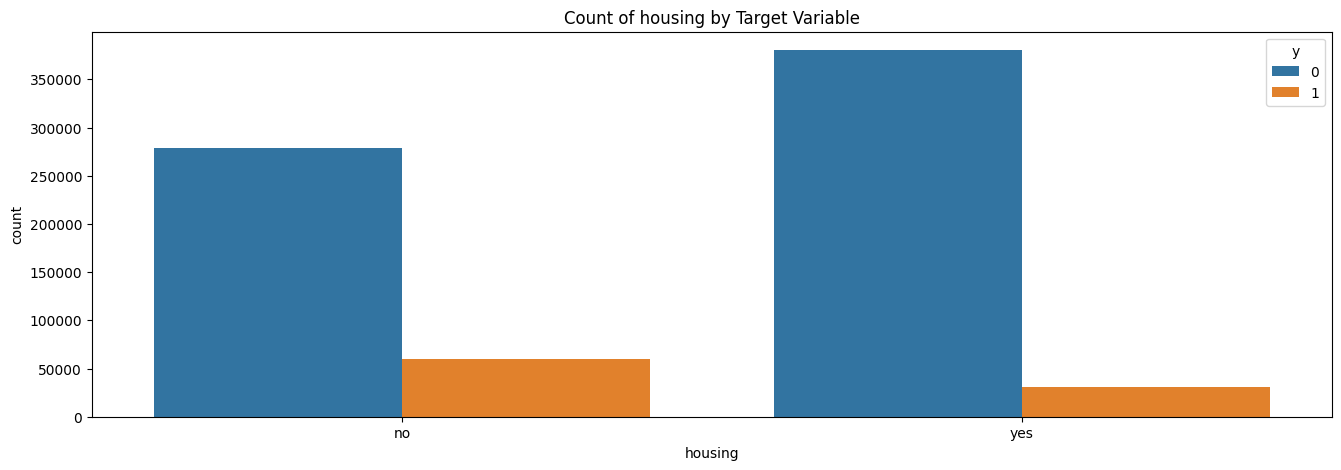

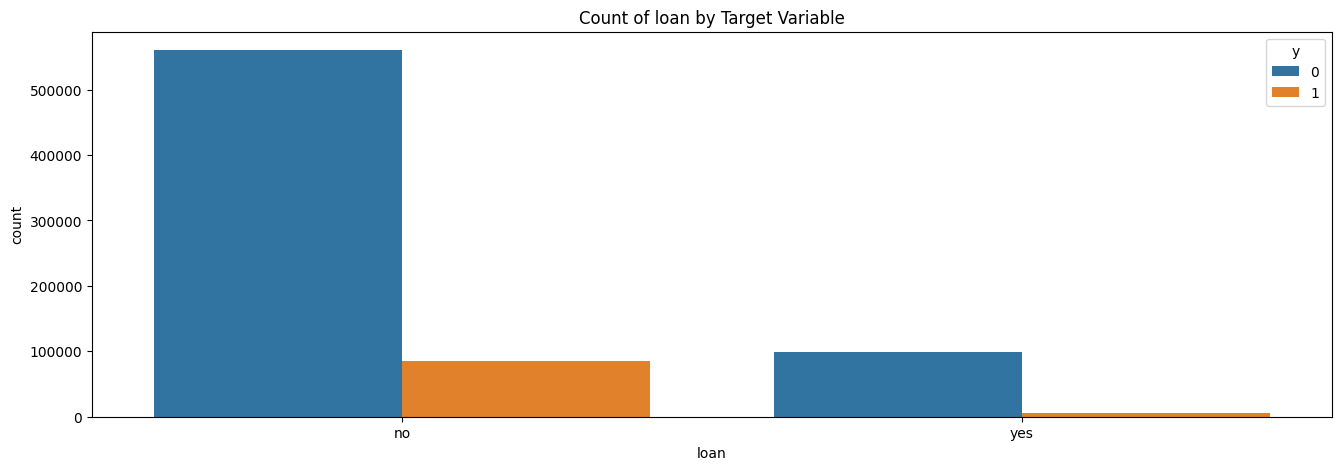

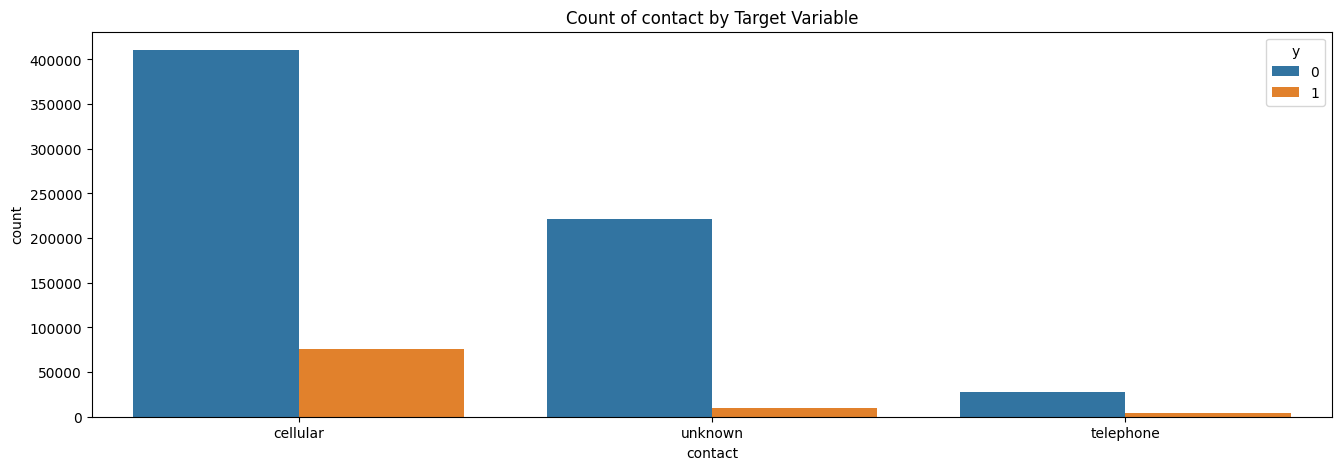

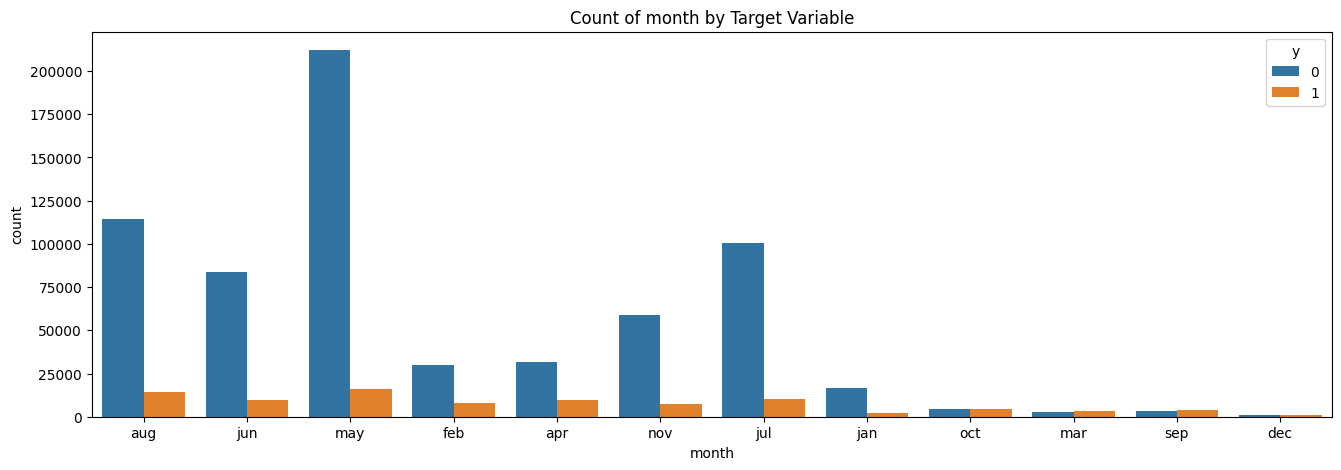

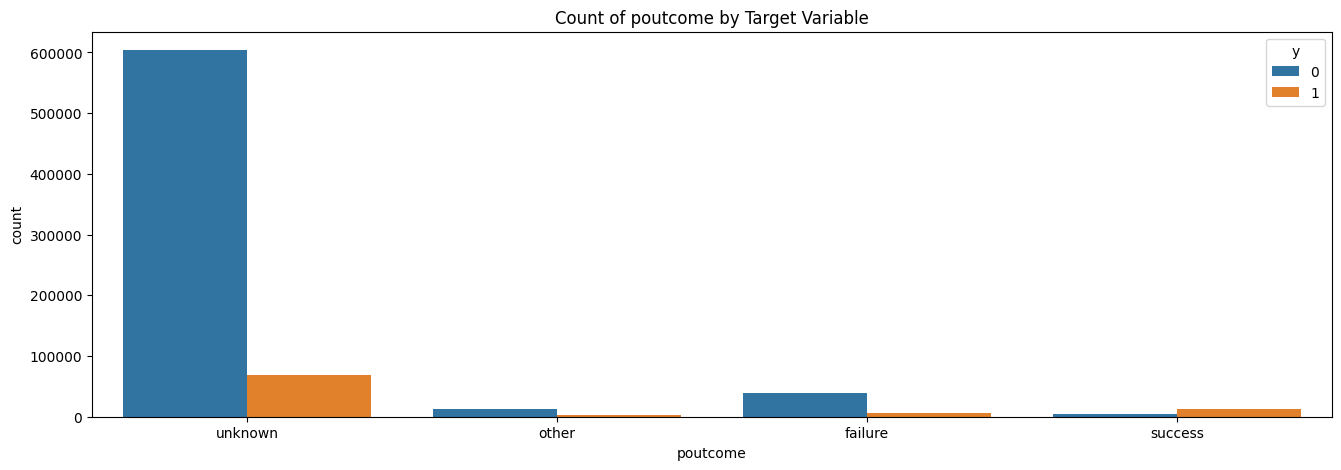

In [10]:
#provide counts of each category by success/failure
for column in categorical_columns:
    plt.figure(figsize=(16, 5))
    sns.countplot(data=train_df, x=column, hue='y')
    plt.title(f'Count of {column} by Target Variable')
    plt.show()
            
        

In [35]:
#check chi sq test for independence between cateogorical features and success/failure
for column in categorical_columns:
    contingency = pd.crosstab(train_df[column], train_df['y'])
    print(contingency)
    chi2, p, dof, ex = stats.chi2_contingency(contingency)
    print(f"Chi-square test p-value of {column}: {p}")

y                   0      1
job                         
admin.          72002   9490
blue-collar    159000  11498
entrepreneur    16276   1442
housemaid       14565   1347
management     149141  26400
retired         26521   8664
self-employed   16558   2462
services        58898   5311
student          7757   4010
technician     121766  16341
unemployed      14463   3171
unknown          2565    352
Chi-square test p-value of job: 0.0
y              0      1
marital                
divorced   66105   8302
married   431783  48976
single    161624  33210
Chi-square test p-value of marital: 0.0
y               0      1
education               
primary     91241   8269
secondary  359309  42374
tertiary   190504  37004
unknown     18458   2841
Chi-square test p-value of education: 0.0
y             0      1
default               
no       647258  89893
yes       12254    595
Chi-square test p-value of default: 5.685409277005814e-150
y             0      1
housing               
no       

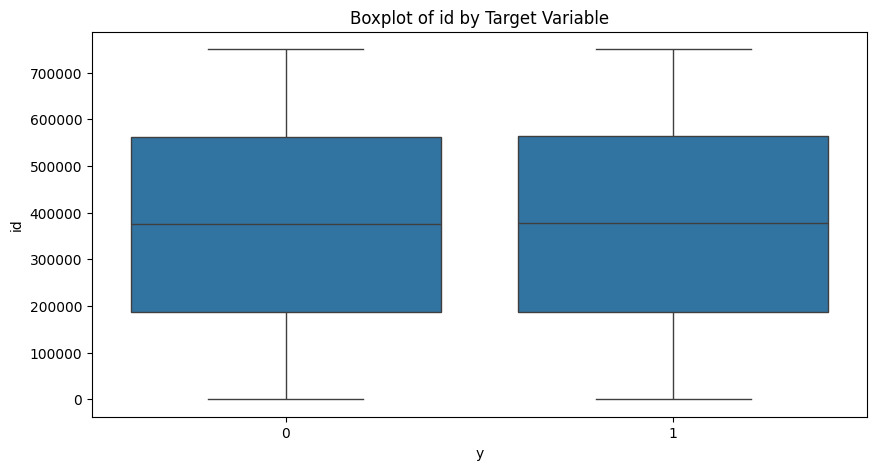

Point-biserial corr for id and y: 0.0006154193660829683 (p=0.5940557545932943)


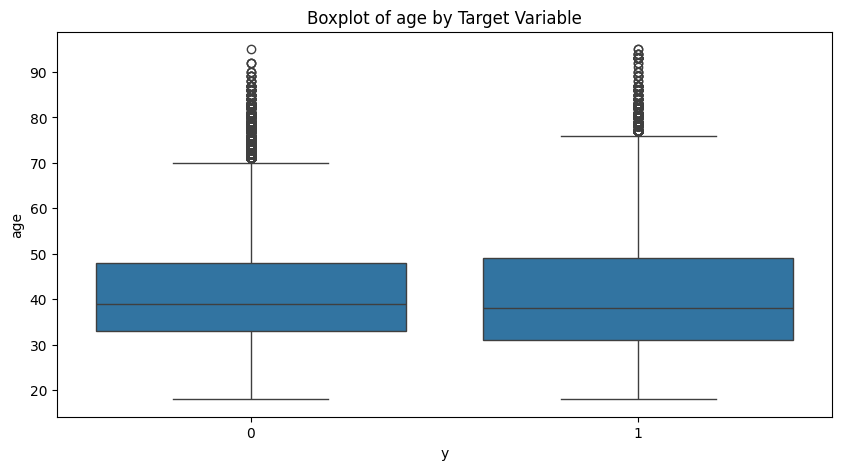

Point-biserial corr for age and y: 0.009523284914026887 (p=1.616343969491633e-16)


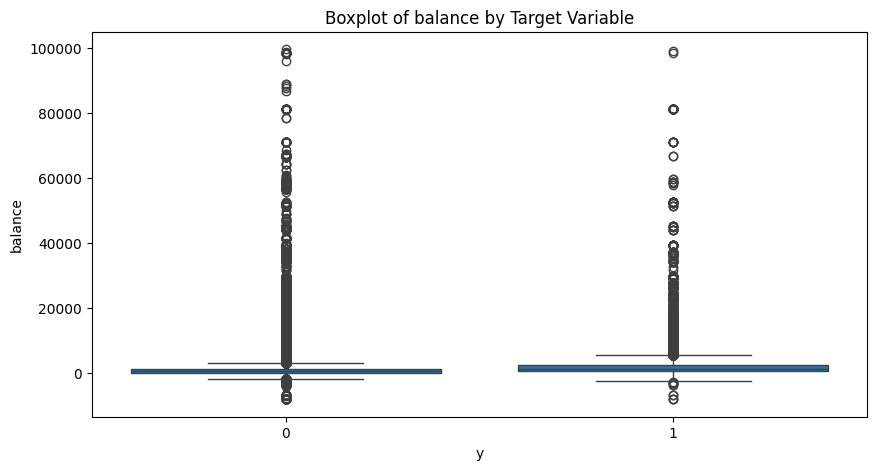

Point-biserial corr for balance and y: 0.12251318289525034 (p=0.0)


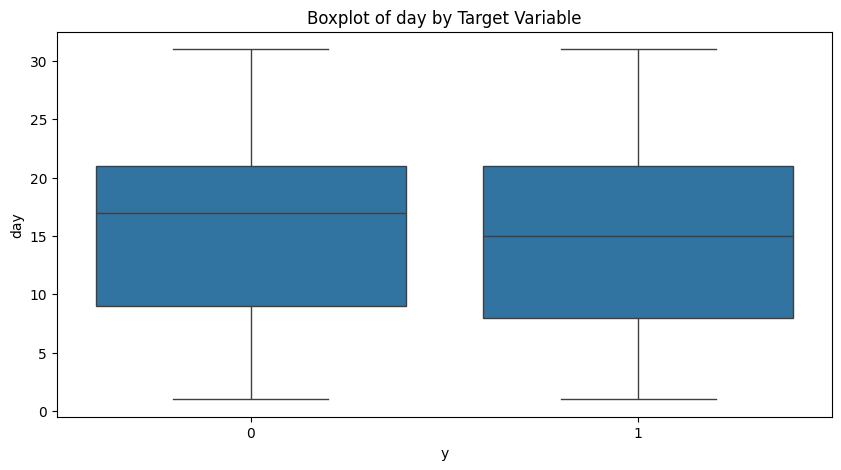

Point-biserial corr for day and y: -0.049624948171923214 (p=0.0)


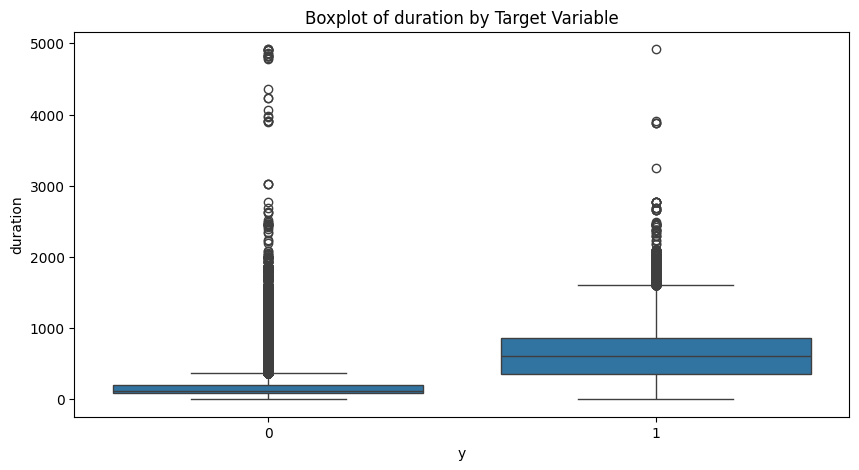

Point-biserial corr for duration and y: 0.5192829726954763 (p=0.0)


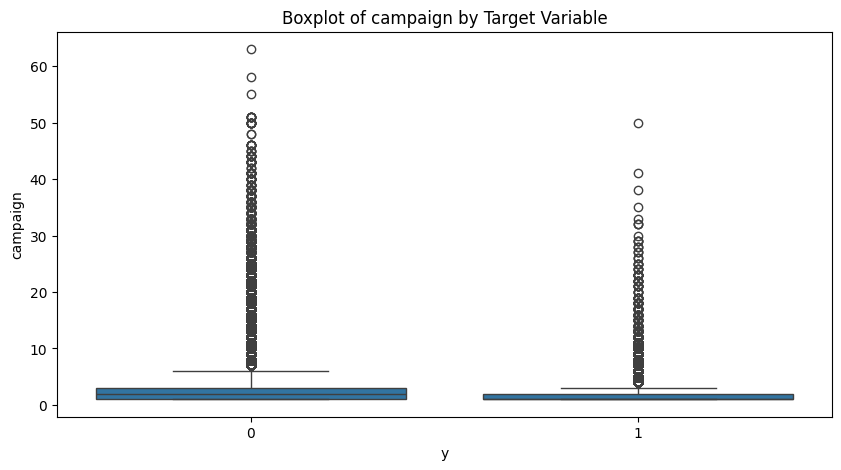

Point-biserial corr for campaign and y: -0.07582858839179966 (p=0.0)


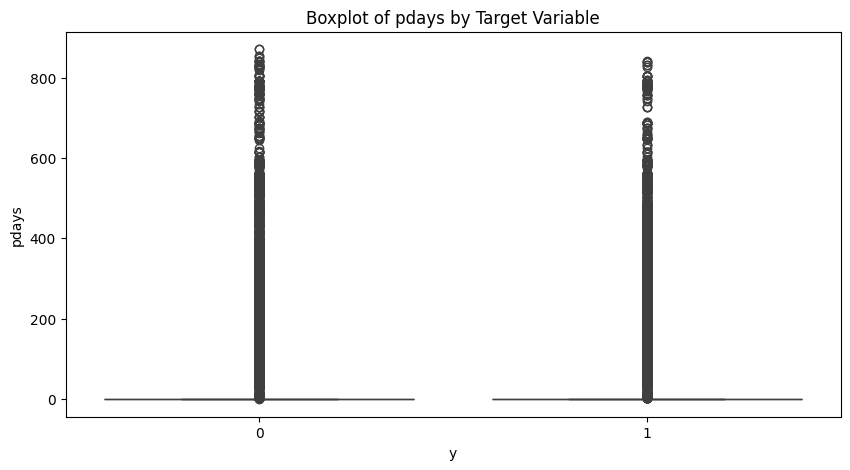

Point-biserial corr for pdays and y: 0.08927670336150514 (p=0.0)


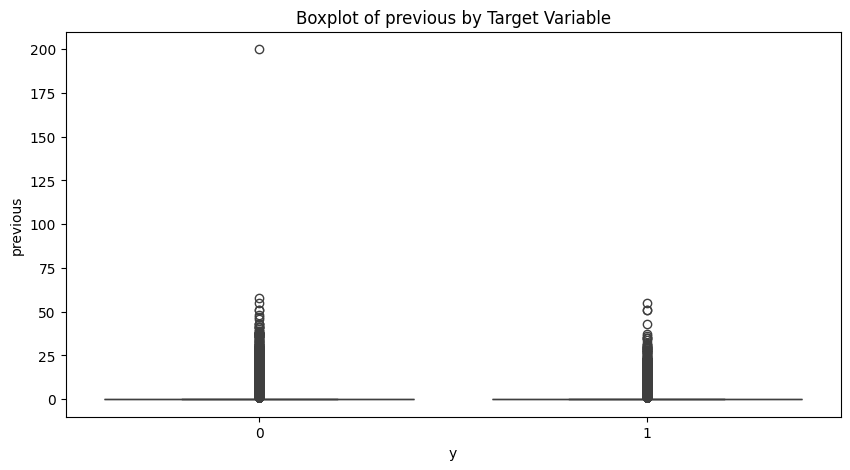

Point-biserial corr for previous and y: 0.1195518575568664 (p=0.0)


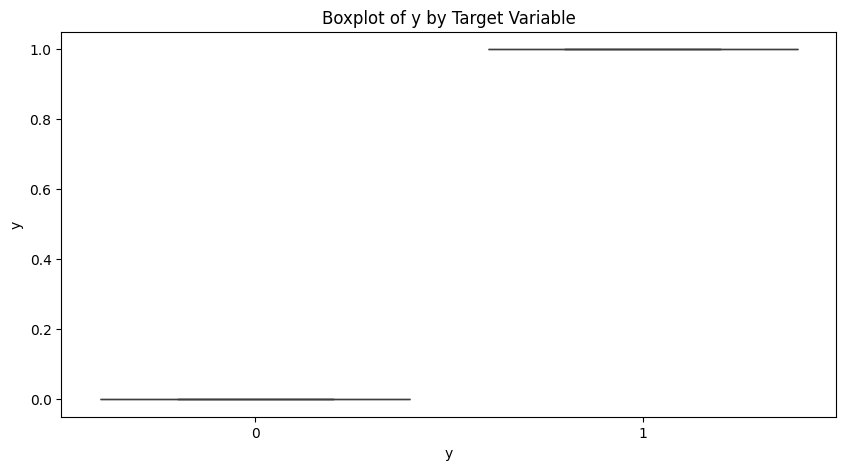

Point-biserial corr for y and y: 0.9999999999999991 (p=0.0)


In [37]:
#numerical check distribution of numerical columns against target variable
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train_df, x='y', y=column)
    plt.title(f'Boxplot of {column} by Target Variable')
    plt.show()
    corr, p = stats.pointbiserialr(train_df[column], train_df['y'])
    print(f'Point-biserial corr for {column} and y: {corr} (p={p})')

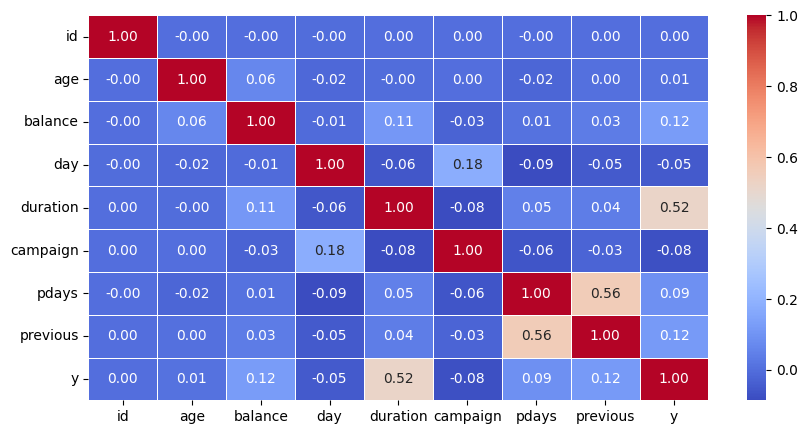

In [13]:
#build correlation matrix to evaluate any confounding variables
corr_matrix = train_df[numerical_columns].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

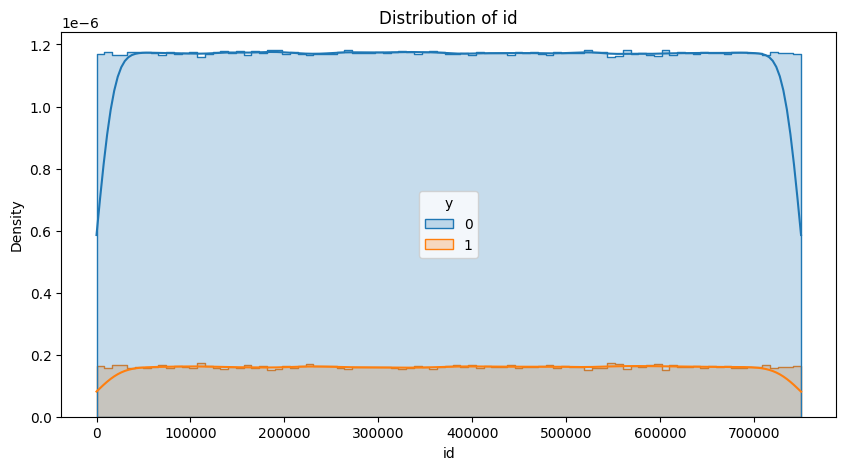

skewness of id: -1.963100174775205e-15


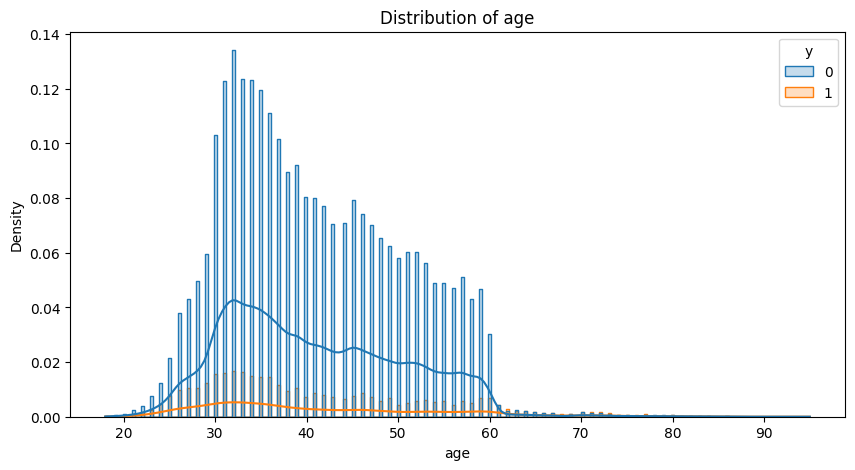

skewness of age: 0.5861373244498731


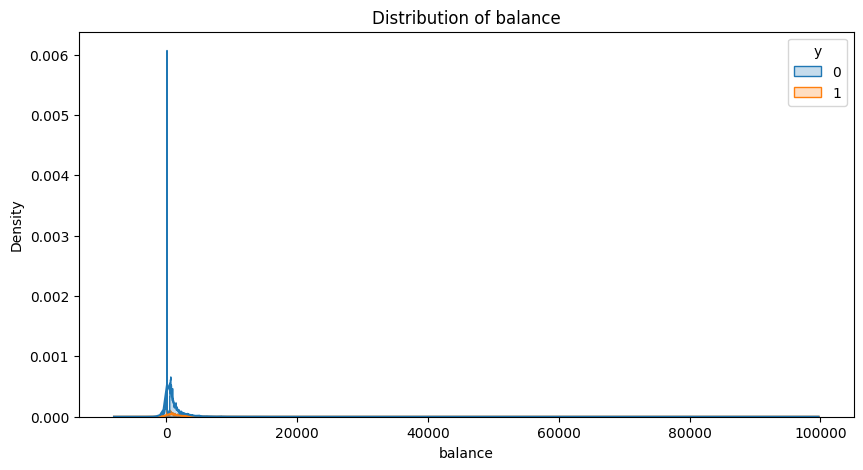

skewness of balance: 12.304122777345025


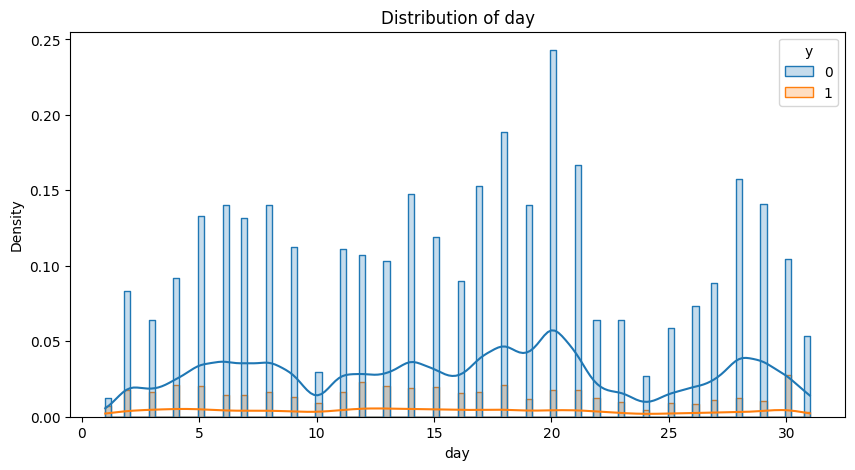

skewness of day: 0.05401417935256725


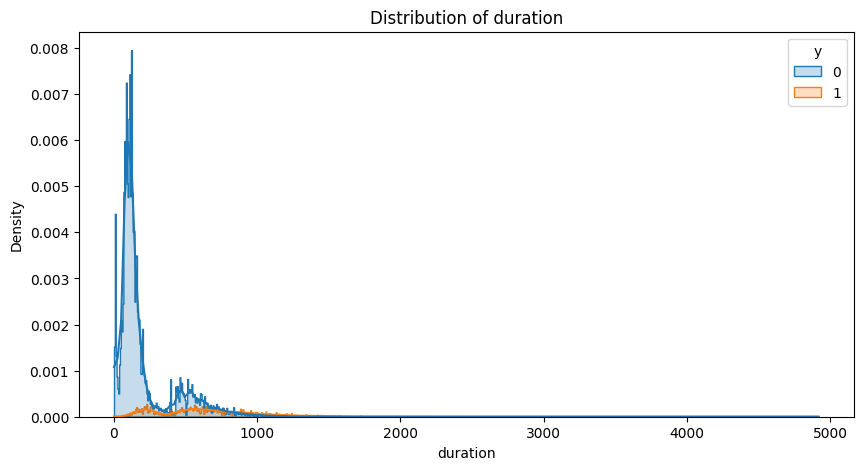

skewness of duration: 2.048776487065909


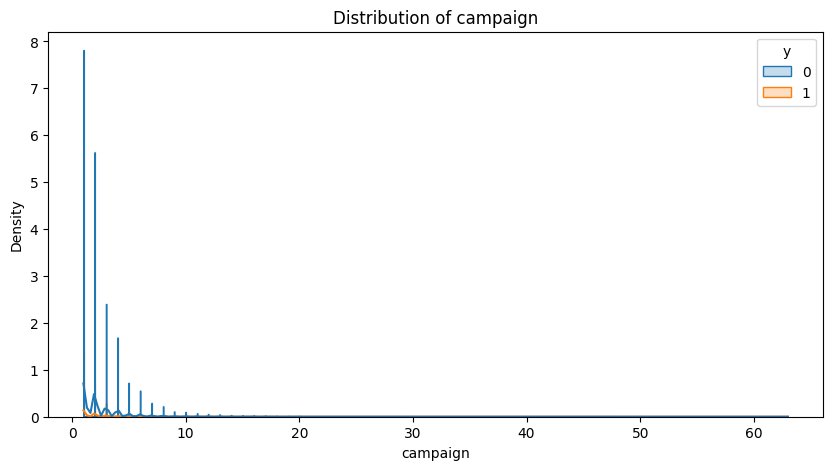

skewness of campaign: 4.810436696187615


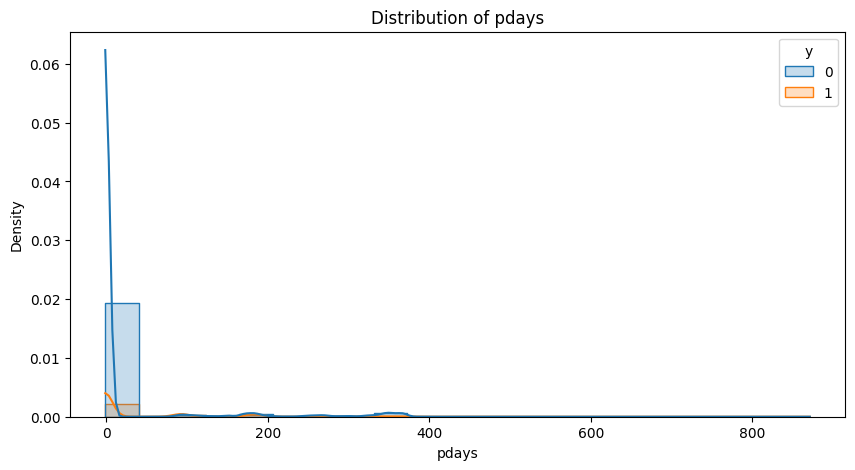

skewness of pdays: 3.6250486860732445


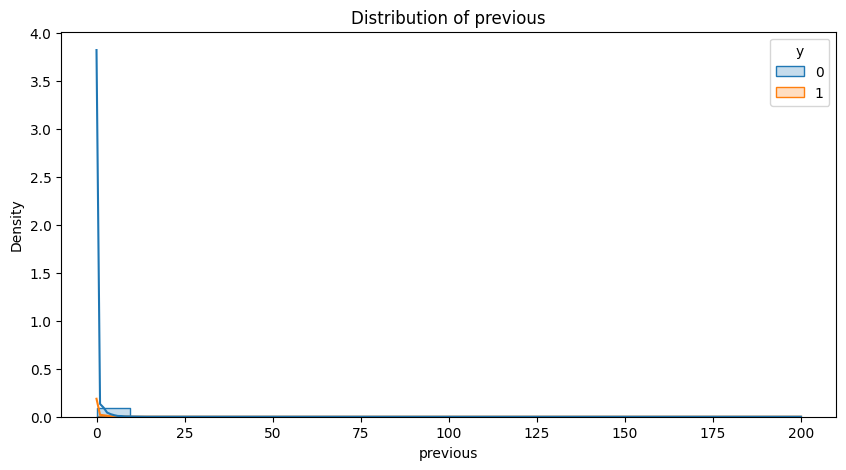

skewness of previous: 13.749885331453086


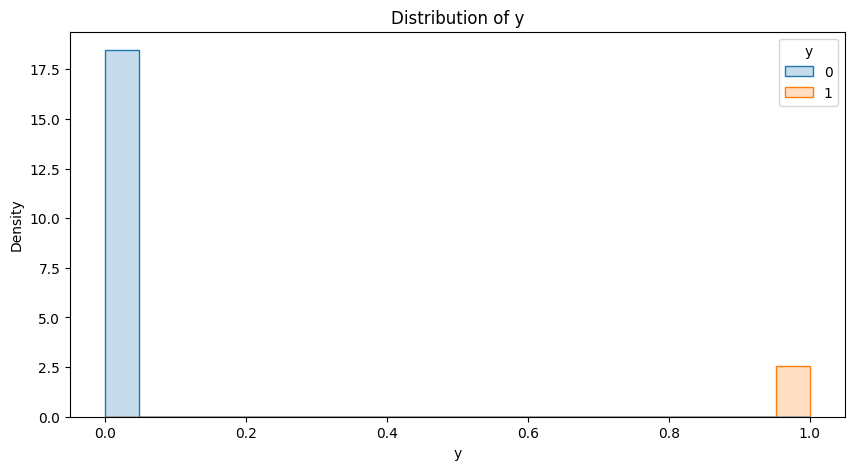

skewness of y: 2.3292956042302304


In [34]:
#check distribution of numerical variables and check for skewnes in data
for column in numerical_columns:
        plt.figure(figsize=(10,5))
        sns.histplot(data=train_df, x=column, hue='y', kde=True, element="step", stat="density")
        plt.title(f"Distribution of {column}")
        plt.show()
        print(f"skewness of {column}: {train_df[column].skew()}")

In [15]:
#split df into train/test to optimize model
x = train_df.drop(columns=['y', 'id'],axis=1)
y = train_df['y']

In [16]:
#ohe categorical variables for model
x_encoded = pd.get_dummies(x, drop_first=True)

In [17]:
#split data into train/test sets
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42,test_size=.1)

In [18]:
#create randomforesst classifier and test model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#predict 
y_pred = rf.predict(x_test)

In [20]:
#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred)

In [21]:
print(accuracy)

0.8128271887429964


In [23]:
#due to class imbalance lets implement smote
from imblearn.over_sampling import SMOTE

In [24]:
#use smote to account for imbalance in target variable
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [25]:
#create randomforesst classifier and test model
rf2 = RandomForestClassifier(class_weight='balanced',random_state=42)

rf2.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
#predict 
y_pred = rf2.predict(x_test)

In [27]:
#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred)

In [28]:
print(accuracy)

0.8025586680958898


In [29]:
#logistic regression
cat_cols = x_train.select_dtypes(include=['object']).columns
num_cols = x_train.select_dtypes(include=['int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logistic_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])


In [30]:
logistic_reg_pipeline.fit(x_train, y_train)
y_pred_lr = logistic_reg_pipeline.predict(x_test)

In [31]:
#test accuracy based on roc_auc scoring 
accuracy = roc_auc_score(y_test,y_pred_lr)

In [32]:
print(accuracy)

0.8058705185300031


logistic regression and random forest both perform in low 80% roc

In [45]:
#xgboost classifier to improve roc
model = XGBClassifier(scale_pos_weight=9, max_depth=6, n_estimators=150, random_state=42)
model.fit(x_train, y_train)

y_pred_prob = model.predict_proba(x_test)[:,1]

y_pred = (y_pred_prob >= .5).astype(int)

print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

ROC AUC: 0.9064460392519567


to acheive higher roc we will need to perform some feature engineering

In [64]:
#day and age had low correlation with target variable lets see if dropping can improve performance
x_train2 = x_train.drop(columns=['day','age'],axis=1)
x_test2 = x_test.drop(columns=['day','age'],axis=1)

model = XGBClassifier(scale_pos_weight=8, max_depth=6, n_estimators=150, random_state=42)
model.fit(x_train, y_train)

y_pred_prob = model.predict_proba(x_test)[:,1]

y_pred = (y_pred_prob >= .5).astype(int)

print(f"ROC AUC after dropping day and age: {roc_auc_score(y_test, y_pred)}")

ROC AUC after dropping day and age: 0.9076012574312476


In [67]:
for i in np.arange(7, 9, 0.2):
    model = XGBClassifier(scale_pos_weight=i, max_depth=6, n_estimators=150, random_state=42)
    model.fit(x_train, y_train)

    y_pred_prob = model.predict_proba(x_test)[:,1]

    y_pred = (y_pred_prob >= .5).astype(int)

    print(f"ROC AUC with scale_pos_weight={i}: {roc_auc_score(y_test, y_pred)}")

ROC AUC with scale_pos_weight=7.0: 0.9067358712736837
ROC AUC with scale_pos_weight=7.2: 0.9071031232624781
ROC AUC with scale_pos_weight=7.4: 0.9071824478208802
ROC AUC with scale_pos_weight=7.6000000000000005: 0.9073584053291134
ROC AUC with scale_pos_weight=7.800000000000001: 0.907000542641461
ROC AUC with scale_pos_weight=8.0: 0.9076012574312476
ROC AUC with scale_pos_weight=8.200000000000001: 0.9079041876951371
ROC AUC with scale_pos_weight=8.400000000000002: 0.9069007019588555
ROC AUC with scale_pos_weight=8.600000000000001: 0.9072890381078653
ROC AUC with scale_pos_weight=8.8: 0.9080546504105899
